# 대응(쌍체) 표본 검정
대응(쌍체)표본 검정은 같은 대상이나 관련된 두 집단에서 측정한 데이터를 비교할 때 사용되는 통계적 검정 방법입니다. 주로 “전후 변화”나 “처리 전/처리 후”와 같이 서로 관련 있는 두 조건 간의 평균 차이가 통계적으로 유의한지를 판단할 때 쓰입니다.

* 차이값의 정규성: 각 쌍의 차이가 정규분포를 따른다는 가정이 필요합니다. (표본의 크기가 충분히 크면 중심극한정리에 의해 이 가정이 완화될 수 있습니다.)
* 독립성: 각 쌍은 다른 쌍들과 독립적이어야 합니다.
* 데이터의 정확한 짝짓기: 각 쌍의 데이터가 올바르게 짝지어졌는지 확인해야 합니다. 잘못 짝지어진 데이터는 분석 결과에 영향을 줄 수 있습니다.

In [4]:
# 어떤 기업이 새로운 교육 프로그램을 도입해 직원의 성과를 개선하려고 한다.

import pandas as pd

# 귀무가설: 직원 교육 전후가 차이가 없다.
# 대립가설: 직원 교육 전후가 차이가 있다. (전보다 더 좋다)  =>  양쪽 보지 않고 더 큰지만 봄

df = pd.DataFrame({
    'before':[85, 90, 92, 88, 86, 89, 83, 87],
    'after':[85.5,89.9,92.6,89.5,85.8,88.8,84.6,87.8]
})

df["diff"] = df["after"] - df["before"]
df

,before,after,diff
0,85,85.5,0.5
1,90,89.9,-0.1
2,92,92.6,0.6
3,88,89.5,1.5
4,86,85.8,-0.2
5,89,88.8,-0.2
6,83,84.6,1.6
7,87,87.8,0.8


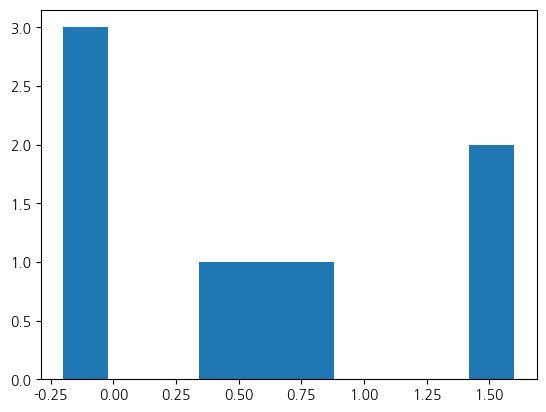

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import koreanize_matplotlib

plt.hist(df["diff"])
plt.show()

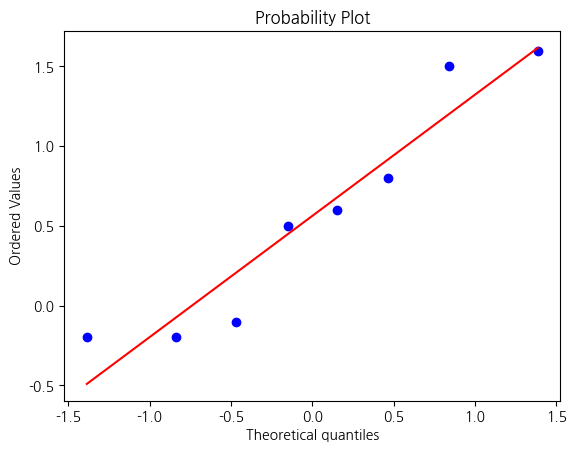

In [9]:
stats.probplot(df["diff"], dist = "norm", plot = plt)
plt.show()

In [11]:
# 이 데이터가 정규성을 띠는지 샤피로 윌크 검정

# 귀무가설 : 이 분포가 정규성을 보인다
# 대립가설 : 이 분포가 정규성을 보이지 않는다 

values, p = stats.shapiro(df['diff'])  
values, p

# p > 0.05  =>  귀무가설 기각x.  정규성을 보인다

(0.885486928626845, 0.21232743678800203)

In [12]:
stats.ttest_rel(df["after"], df["before"], alternative = "greater")
# p < 0.05  =>  귀무가설 기각.  직원 교육 전후가 차이가 있다. 효과가 좋다

TtestResult(statistic=2.2127749675452324, pvalue=0.03127028733756238, df=7)

In [13]:
# 지금은 정규성맞았으니 이거 안써도되나,  만약 정규성 안맞았을경우엔...

stats.wilcoxon(df["after"], df["before"], alternative = "greater")
# p > 0.05  =>  귀무가설 기각x.  직원 교육 전후가 차이가 없다 

WilcoxonResult(statistic=30.0, pvalue=0.0546875)

* 만약 정규성을 따르지 않았다면?

## 1. 연습문제
어떤 기업이 새로운 교육 프로그램을 도입해 직원의 성과를 개선하려고 한다. 동일한 직원 그룹에 대해 교육 전과 후의 성과를 비교했다. 새로윤 교육 프로그램은 효과가 있는지 가설검정하시오. (유의수준 0.05)

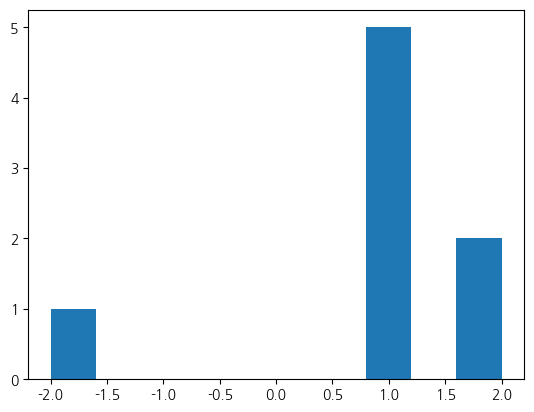

In [17]:
df = pd.DataFrame({
    'before':[85, 90, 92, 88, 86, 89, 83, 87],
    'after':[86, 92, 94, 89, 84, 90, 84, 88]
})

df["diff"] = df["after"] - df["before"]

plt.hist(df["diff"])
plt.show()

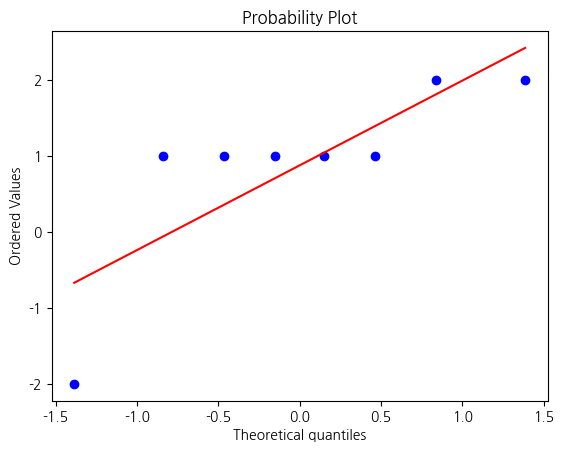

In [18]:
stats.probplot(df["diff"], dist = "norm", plot = plt)
plt.show()

In [19]:
# 이 데이터가 정규성을 띠는지 샤피로 윌크 검정

# 귀무가설 : 이 분포가 정규성을 보인다
# 대립가설 : 이 분포가 정규성을 보이지 않는다 

values, p = stats.shapiro(df['diff'])  
values, p

# p < 0.05  =>  귀무가설 기각.  정규성을 보인다고 할 수 없음.    즉 평균 말고 중앙값에 대해서 확인할것 

(0.6886147375920879, 0.0016734051223900109)

In [20]:
stats.wilcoxon(df["after"], df["before"], alternative = "greater")
# p > 0.05  =>  귀무가설 기각x.  직원 교육 전후가 차이가 없다 

WilcoxonResult(statistic=29.0, pvalue=0.07421875)

## 2. 연습문제
한 학교에서 새로운 교육 프로그램의 효과를 평가하기 위해 15명의 학생을 대상으로 교육 전과 교육 후 시험 점수를 측정하였습니다. 교육 프로그램이 학생들의 성적에 긍정적인 영향을 주었는지 알아보기 위해, 두 시점(교육 전과 교육 후)의 시험 점수에 차이가 있는지를 대응(쌍체) 표본 t-검정을 이용하여 분석하고자 합니다. (유의수준 0.05)

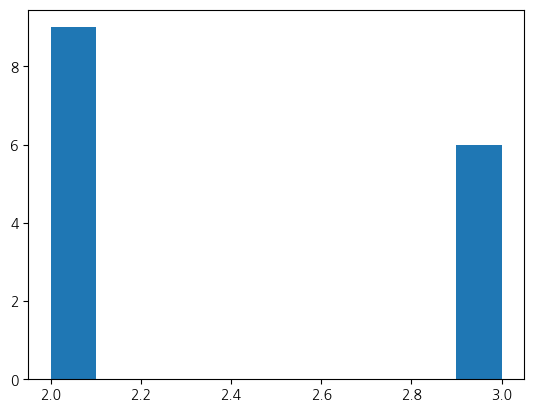

In [25]:
df = pd.DataFrame({
    "before" : [70, 68, 75, 80, 65, 72, 78, 74, 69, 77, 71, 73, 76, 79, 68],
    "after" : [72, 70, 78, 82, 67, 75, 80, 77, 71, 79, 74, 76, 79, 81, 70]
})

df["diff"] = df["after"] - df["before"]

plt.hist(df["diff"])
plt.show()

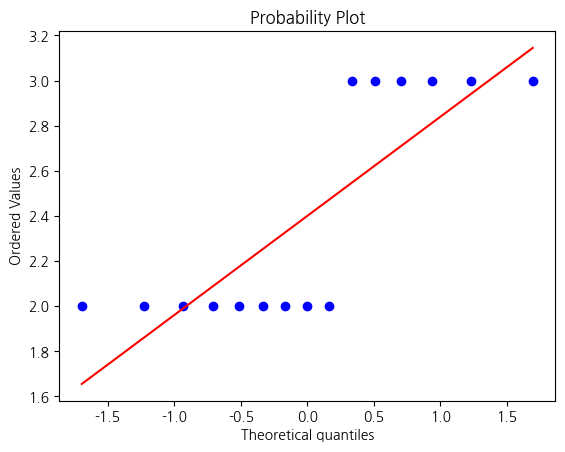

In [26]:
stats.probplot(df["diff"], dist = "norm", plot = plt)
plt.show()

In [27]:
# 이 데이터가 정규성을 띠는지 샤피로 윌크 검정

# 귀무가설 : 이 분포가 정규성을 보인다
# 대립가설 : 이 분포가 정규성을 보이지 않는다 

values, p = stats.shapiro(df['diff'])  
values, p

# p < 0.05  =>  귀무가설 기각.  정규성을 보이지x

(0.6303409987389212, 4.903651437444624e-05)

In [32]:
stats.wilcoxon(df["after"], df["before"], alternative = "greater")
# p < 0.05  =>  귀무가설 기각.  두 시점(교육 전과 교육 후)의 시험 점수에 차이가 있다.  

WilcoxonResult(statistic=120.0, pvalue=3.0517578125e-05)

In [28]:
# 정규성 보인다면...
stats.ttest_rel(df["after"], df["before"], alternative = "greater")
# p < 0.05  =>  귀무가설 기각.  두 시점(교육 전과 교육 후)의 시험 점수에 차이가 있다. 교육 프로그램이 학생들의 성적에 긍정적인 영향을 주었다 

TtestResult(statistic=18.330302779823356, pvalue=1.7468556145095e-11, df=14)

In [30]:
# after - before = 0
stats.ttest_1samp(df["diff"], 0, alternative = "greater")      # 이렇게해도 똑같다 

TtestResult(statistic=18.330302779823356, pvalue=1.7468556145095e-11, df=14)